## --------------------------------------------------------------------------------------------------------------------------

## 2. Adatelemzősebb áttekintés - Adatvizualizáció

### 2.1 Grafikonok rajzolása-  MatPlotLib használatának alapjai**

A MatPlotLib a leggyakrabban használt grafikai függvénycsomag, mely segítségével publikáció minőségű 2D grafikonok készíthetők (neve: MATLAB grafikonokhoz hasonló függvények és output). A megjelenítéshez általában a következő munkafolyamatot használjuk:

* Adatok előkészítése
* A grafikon létrehozása
* Grafikon formázása, testre szabása
* Grafikon elmentése
* Grafikon megjelenítése

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.1.1 Vonaldiagram 

In [5]:
dfTemp = pd.DataFrame({'x':[0,2,4,6,8], 'y':list(range(0,10,2))})

dfTemp['y_0.5'] = dfTemp.y / 2
dfTemp['y_2'] = dfTemp.y * 2
dfTemp['y_3'] = dfTemp.y * 3
dfTemp['y_5'] = dfTemp.y * 5

dfTemp

,x,y,y_0.5,y_2,y_3,y_5
0,0,0,0.0,0,0,0
1,2,2,1.0,4,6,10
2,4,4,2.0,8,12,20
3,6,6,3.0,12,18,30
4,8,8,4.0,16,24,40


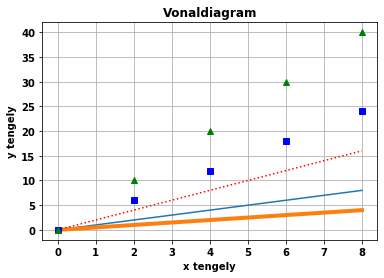

In [6]:
plt.plot(dfTemp.x, dfTemp.y)                              # Alapértelemezett vonal és szín
plt.plot(dfTemp.x, dfTemp['y_0.5'], linewidth=4.0)        # Vonalvastagság 4 pixel
plt.plot(dfTemp.x, dfTemp.y_2, color="r", linestyle=':')  # Szaggatott piros vonal
plt.plot(dfTemp.x, dfTemp.y_3, 'bs')                      # Vonal helyett kék négyzetek
plt.plot(dfTemp.x, dfTemp.y_5, 'g^')                      # Vonal helyett zöld háromszögek
# Grafikon formázása
plt.title('Vonaldiagram')                                 # Cím hozzáadása
plt.xlabel('x tengely')                                   # X tengely neve      
plt.ylabel('y tengely')                                   # Y tengely neve
plt.grid(True)                                            # Rácsozás
# Grafikon elmentése - opcionális
plt.savefig("Vonaldiagram.png")
# Grafikon megjelenítése - opcionális
plt.show()

### 2.1.2 Hisztogram

[ 84.65582068  97.89403011 102.98638409 ...  78.64773498 123.8176423
 106.07302708]


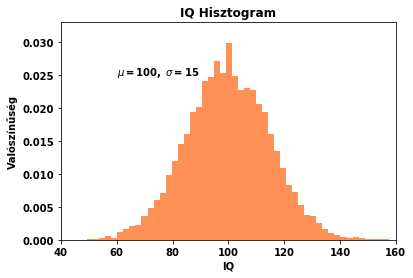

In [9]:
# Adatgenerálás
np.random.seed(2017)
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
print(x)
# Grafikon létrehozása egyedi színnel
n, bins, patches = plt.hist(x, 50, density=True, stacked=True, facecolor='#ff6d1d', alpha=0.75)
# Grafikon formázása, testre szabása
plt.xlabel('IQ')
plt.ylabel('Valószínűség')
plt.title('IQ Hisztogram')
# A használt képletet is kiírjuk
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# És a tengelyeket is formázzuk
plt.axis([40, 160, 0, 0.033])                   
# Grafikon megjelenítése
plt.show()

### 2.1.3 Pont diagramm

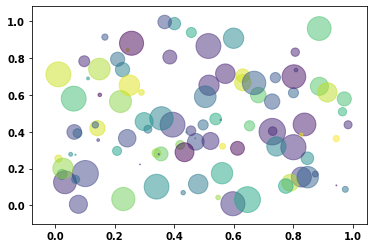

In [10]:
# Adatgenerálás
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2
# Grafikon létrehozása
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# Grafikon megjelenítése
plt.show()

### Más grafikonrajzoló csomagok
A Matplotlib mellett más népszerű grafikon rajzoló csomagok is használhatóak pythonban. A legismertebbek:

* Seaborn: a csomag a matplotlib-en alapul, új grafikontípusok érhetők el benne, illetve a matplotlib-ben elérhető grafikon típusok pedig egyszerűbben, szebb kűlcsínnel használhatóak. A seaborn csomagot általában a matplotlib-bel felváltva használjuk a munkában. (https://seaborn.pydata.org/tutorial.html)
* Plotly (Express): segítségével bizonyos fajta interaktivitás biztosítható az adatok elemzése és prezentálása során.
* Bokeh: egy másik népszerű interaktív elemző eszköz (https://docs.bokeh.org/en/1.2.0/)
* Holoview: az adatok és a vizualizáció szorosabb integrációját kínálja. Több információ a https://holoviews.org/index.html oldalon érhető el
* Altair: A Vega vizualizációs nyelven alapúló statisztikai vizualizációs csomag, melyről több információ a https://altair-viz.github.io/index.html oldalon olvasható.


### 2.2 Grafikonok rajzolása-  Seaborn használatának alapjai

In [18]:
import numpy as np
import seaborn as sns

### 2.2.1 Pont diagramm

In [22]:
tips = sns.load_dataset("tips")
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


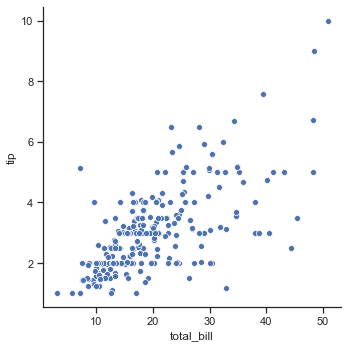

In [19]:
sns.relplot(x="total_bill", y="tip", data=tips, kind="scatter")

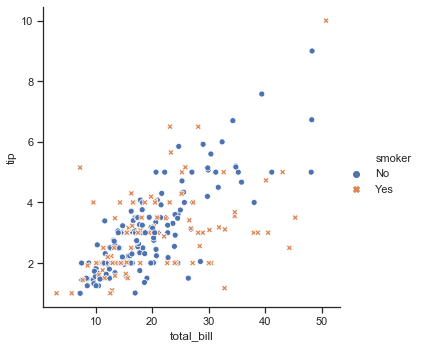

In [21]:
sns.relplot(x="total_bill",    # X tengely változója
            y="tip",           # Y tengely változója 
            hue="smoker",      # Kategória változó megadása
            style="smoker",
            data=tips,
            kind="scatter" )

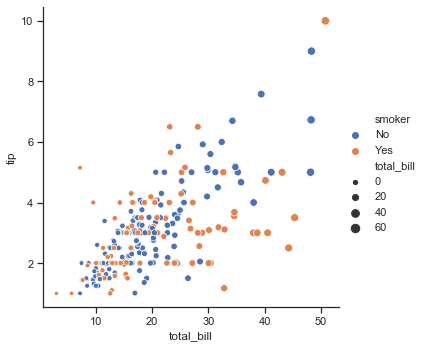

In [26]:
sns.relplot(x="total_bill",
            y="tip",
            size="total_bill",
            hue="smoker",
            kind="scatter",
            data=tips);

### 2.2.2 Boxplot

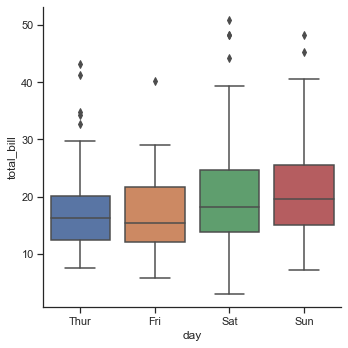

In [29]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

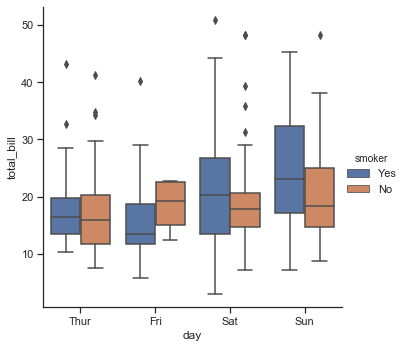

In [30]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)